In [ ]:
# SALUD MURCIA

In [28]:
# Lectura del conjunto de datos obtenido de la pagina de salud de Murcia 
# https://www.murciasalud.es/pagina.php?id=458869
# Recogidos desde el 08/03/2020 hasta el dia 25/03/2020
from pandas import read_csv
lectura = read_csv('casos_diarios_total_regional.csv', skiprows = 4, encoding='latin-1', sep = ';', index_col = 0, na_values = ['NaN', 'NaT'])
#lectura = read_csv('casos_diarios_total_regional.csv', skiprows = 4, encoding='latin-1', sep = ';', index_col = 0, parse_dates = ['Fecha'], na_values = ['NaN', 'NaT'])

# Headers = columnas de mi conjunto de datos. Si no especificamos asume que son las de la primera fila leida
# Skiprows = n: con n = numero de filas que quiero saltar. Las cuatro primeras son texto -> las saltamos
# Encoding = 'latin-1': para que no de errores de codificacion de algunos caracteres 
# Sep = ';': delimitador que separa las columnas
# Index_col = 0: usar la primera columna (fechas) como filas del dataframe

In [29]:
# Renombramos los nombres de algunas de las columnas para que queden mas compactos
datos = lectura.rename(columns={'Pruebas_PCR_Ag':'Pruebas_PCR_Ag',
                                'Casos_incidentes_PCR/Ag+':'Incidentes_PCR_Ag',
                                'Hospitalizados': 'H',
                                'Hospitaliz_UCI':'H_UCI',
                                'Asintomatico_hombre_<45años': 'Asint_H_<45',
                                'Asintomatico_hombre_45a64años': 'Asint_H_45a64',
                                'Asintomatico_hombre_+65años': 'Asint_H_+65',
                                'Sintomatico_hombre_<45años': 'Sint_H_<45',
                                'Sintomatico_hombre_45a64años': 'Sint_H_45a64',
                                'Sintomatico_hombre_+65años': 'Sint_H_+65',
                                'Asintomatico_mujer_<45años': 'Asint_M_<45',
                                'Asintomatico_mujer_45a64años': 'Asint_M_45a64',
                                'Asintomatico_mujer_+65años': 'Asint_M_+65',
                                'Sintomatico_mujer_<45años': 'Sint_M_<45',
                                'Sintomatico_mujer_45a64años': 'Sint_M_45a64',
                                'Sintomatico_mujer_+65años': 'Sint_M_+65'})

In [30]:
import pandas as pd
df = pd.DataFrame(datos)

In [31]:
df.head(5)

,Pruebas_PCR_Ag,Incidentes_PCR_Ag,H,H_UCI,Defunciones,Asint_H_<45,Asint_H_45a64,Asint_H_+65,Sint_H_<45,Sint_H_45a64,Sint_H_+65,Asint_M_<45,Asint_M_45a64,Asint_M_+65,Sint_M_<45,Sint_M_45a64,Sint_M_+65
Fecha,,,,,,,,,,,,,,,,,
08/03/2020,130.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
09/03/2020,21.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
10/03/2020,39.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
11/03/2020,116.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,4.0,1.0,1.0
12/03/2020,136.0,9.0,4.0,1.0,0.0,3.0,1.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [38]:
# Nos quedamos solo con la serie de casos incidentes (casos totales) por pruebas PCR o antigenos
# (En principio considero que estos son los datos mas relevantes para mi estudio)
df_positivos = df['Incidentes_PCR_Ag']
print(df_positivos.head(5))

Fecha
08/03/2020     1.0
09/03/2020     3.0
10/03/2020     6.0
11/03/2020    12.0
12/03/2020     9.0
Name: Incidentes_PCR_Ag, dtype: float64


In [39]:
df_positivos.size

495

In [40]:
# Fijandonos en las columnas del archivo .csv vemos que hay un total de 382 filas de datos (dias)
# Como el tamaño de df_positivos es 495 > 382, podemos sospechar que existen datos de mas
# Mostramos las 113 ultimas filas para ver que en efecto existen valores NaN no definidos
df_positivos.tail(113)

Fecha
25/03/2021    88.0
NaN            NaN
NaN            NaN
NaN            NaN
NaN            NaN
              ... 
NaN            NaN
NaN            NaN
NaN            NaN
NaN            NaN
NaN            NaN
Name: Incidentes_PCR_Ag, Length: 113, dtype: float64

In [41]:
# Como podemos observar, hay muchas columnas que tienen datos desconocidos (identificados con NaN)
# https://stackabuse.com/python-how-to-handle-missing-dataframe-values-in-pandas/
# En este enlace vemos como podemos eliminar las filas cuyos valores son NaN -> mediante la funcion dropna
# De esta forma los datos ya se visualizaran solo en las fechas correctas, es decir, las puestas en el .csv
df_positivos.dropna(axis = 0, inplace = True)

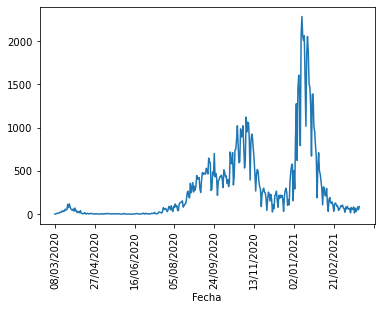

In [43]:
# Visualización de los datos con un plot simple
from matplotlib import pyplot
df_positivos.plot()
# Rotamos 45º las fechas para que se vean correctamente
pyplot.xticks(rotation=90)
pyplot.show()

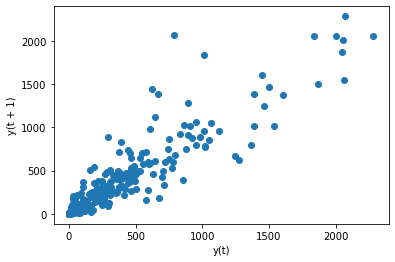

In [44]:
# Con el siguiente gráfico podemos hacer una primera aproximación sobre la presencia del virus
# en la Región de Murcia. A simple vista, la pandemia parece haber sido bien controlada, puesto que
# la nube de puntos más densa de encuentra entre los 0 y 500 casos
from pandas.plotting import lag_plot
lag_plot(df_positivos)
pyplot.show()